In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
print(X_test)

# del X_train,X_test

(10000,)
[[ 1.56143766 -0.18630063]
 [-0.19754917 -0.29795513]
 [ 0.86378122 -2.17856711]
 ...
 [-1.98981714 -2.14450451]
 [ 0.93644003 -0.49672496]
 [ 1.03066534 -1.24019966]]


[-0.18630063 -0.29795513 -2.17856711 ... -2.14450451 -0.49672496
 -1.24019966]


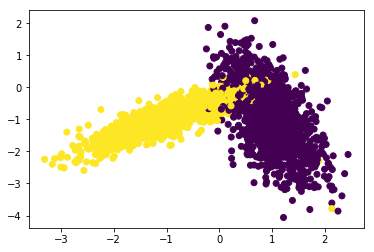

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
print(X_test[:,1])
plt.show()

# Implementing Custom GridSearchCV

In [0]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def GridSearch(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            # check this out: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))
            #p=list(range(1, len(x_train)))
            #print(p)

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            print(Y_train)
            print(classifier.predict(X_train))
            print("-----------------------------------------------------------------------------------------")

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            #print(testscores_folds)

            Y_predicted = classifier.predict(X_train)
            print(Y_train)
            print(Y_predicted)
            
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
            print(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

  0%|          | 0/11 [00:00<?, ?it/s]

[0 1 0 ... 0 0 1]
[1 1 0 ... 0 0 1]
-----------------------------------------------------------------------------------------


  9%|▉         | 1/11 [00:00<00:02,  3.40it/s]

[0 1 0 ... 0 0 1]
[1 1 0 ... 0 0 1]
0.9662222222222222
[1 0 0 ... 0 1 0]
[1 0 0 ... 0 0 0]
-----------------------------------------------------------------------------------------


 18%|█▊        | 2/11 [00:00<00:02,  3.48it/s]

[1 0 0 ... 0 1 0]
[1 0 0 ... 0 0 0]
0.9604444444444444
[0 1 1 ... 1 0 1]
[0 1 1 ... 1 0 1]
-----------------------------------------------------------------------------------------


 27%|██▋       | 3/11 [00:00<00:02,  3.48it/s]

[0 1 1 ... 1 0 1]
[0 1 1 ... 1 0 1]
0.9591111111111111
[1 0 1 ... 0 1 0]
[1 0 1 ... 0 1 0]
-----------------------------------------------------------------------------------------


 36%|███▋      | 4/11 [00:01<00:01,  3.54it/s]

[1 0 1 ... 0 1 0]
[1 0 1 ... 0 1 0]
0.9593333333333334
[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]
-----------------------------------------------------------------------------------------


 45%|████▌     | 5/11 [00:01<00:01,  3.52it/s]

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]
0.9575555555555556
[1 1 1 ... 1 0 0]
[1 1 1 ... 1 0 0]
-----------------------------------------------------------------------------------------


 55%|█████▍    | 6/11 [00:01<00:01,  3.52it/s]

[1 1 1 ... 1 0 0]
[1 1 1 ... 1 0 0]
0.9597777777777777
[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]
-----------------------------------------------------------------------------------------


 64%|██████▎   | 7/11 [00:01<00:01,  3.47it/s]

[1 0 1 ... 0 0 1]
[1 0 1 ... 0 0 1]
0.9557777777777777
[1 0 1 ... 0 0 0]
[1 0 1 ... 0 0 0]
-----------------------------------------------------------------------------------------


 73%|███████▎  | 8/11 [00:02<00:00,  3.43it/s]

[1 0 1 ... 0 0 0]
[1 0 1 ... 0 0 0]
0.9588888888888889
[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]
-----------------------------------------------------------------------------------------


 82%|████████▏ | 9/11 [00:02<00:00,  3.33it/s]

[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]
0.9577777777777777
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
-----------------------------------------------------------------------------------------


 91%|█████████ | 10/11 [00:02<00:00,  3.27it/s]

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
0.9522222222222222
[0 0 1 ... 1 1 1]
[0 0 1 ... 1 1 1]
-----------------------------------------------------------------------------------------


100%|██████████| 11/11 [00:03<00:00,  3.20it/s]

[0 0 1 ... 1 1 1]
[0 0 1 ... 1 1 1]
0.9564444444444444


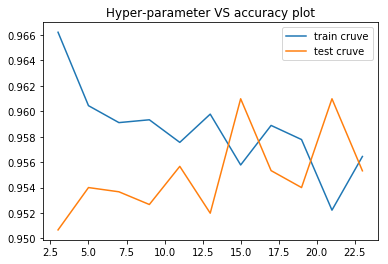

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 1

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)


plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

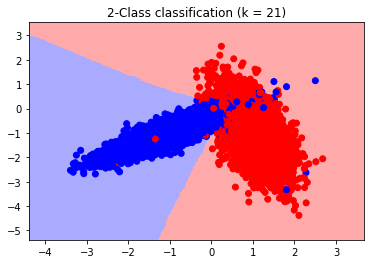

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)